<a href="https://colab.research.google.com/github/FR00789/FR00789/blob/main/sample1121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
!cp "/content/drive/My Drive/dataset.zip" .

In [39]:
!unzip dataset.zip #解凍：ここを変更。「dataset」のところをアップロードしたzipファイル名に変更してください。　- ファイルを消す場合「!rm dataset.zip」

Archive:  dataset.zip
replace dataset/gesA/ges_a_16.05.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/gesA/ges_a_16.05.jpg  
  inflating: dataset/gesA/ges_a_16.1.jpg  
  inflating: dataset/gesA/ges_a_16.15.jpg  
  inflating: dataset/gesA/ges_a_16.2.jpg  
  inflating: dataset/gesA/ges_a_16.25.jpg  
  inflating: dataset/gesA/ges_a_16.3.jpg  
  inflating: dataset/gesA/ges_a_16.35.jpg  
  inflating: dataset/gesA/ges_a_16.4.jpg  
  inflating: dataset/gesA/ges_a_16.45.jpg  
  inflating: dataset/gesA/ges_a_16.5.jpg  
  inflating: dataset/gesA/ges_a_16.55.jpg  
  inflating: dataset/gesA/ges_a_16.6.jpg  
  inflating: dataset/gesA/ges_a_16.65.jpg  
  inflating: dataset/gesA/ges_a_16.7.jpg  
  inflating: dataset/gesA/ges_a_16.75.jpg  
  inflating: dataset/gesA/ges_a_16.8.jpg  
  inflating: dataset/gesA/ges_a_16.85.jpg  
  inflating: dataset/gesA/ges_a_16.9.jpg  
  inflating: dataset/gesA/ges_a_16.95.jpg  
  inflating: dataset/gesA/ges_a_16.jpg  
  inflating: dataset/gesA/ges_a_

In [40]:
import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
# from keras.optimizers import Adam # ここでエラーとなるので以下のコードに変更
from tensorflow.keras.optimizers import Adam # 「tensorflow.」を追加
import matplotlib.pyplot as plt
import time

In [44]:
train_data_path = 'dataset' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力

image_size = 28 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。

color_setting = 3  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。

folder = ['gesA', 'gesB','gesC','gesD'] # ここを変更。データセット画像のフォルダ名（クラス名）を半角英数で入力

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')

今回のデータで分類するクラス数は「 4 」です。


In [45]:
#3 データセットの読み込みとデータ形式の設定・正規化・分割 

X_image = []  
Y_label = [] 
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name
  files = glob.glob(read_data + '/*.jpg') #ここを変更。png形式のファイルを利用する場合のサンプルです。
  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = img_to_array(img)
    X_image.append(array)
    Y_label.append(index)

X_image = np.array(X_image)
Y_label = np.array(Y_label)

X_image = X_image.astype('float32') / 255
Y_label = np_utils.to_categorical(Y_label, class_number) #上記のコードのかわり


--- 読み込んだデータセットは dataset/gesA です。
--- 読み込んだデータセットは dataset/gesB です。
--- 読み込んだデータセットは dataset/gesC です。
--- 読み込んだデータセットは dataset/gesD です。


In [49]:
train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.30)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels

In [50]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png') #ここはKerasのバージョンなどにより使えないのでコメントアウト

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

start_time = time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       18560     
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 256)        

Epoch 1/100
166/166 [==============================] - 15s 86ms/step - loss: 1.3952 - accuracy: 0.2307 - val_loss: 1.3853 - val_accuracy: 0.4775
Epoch 2/100
166/166 [==============================] - 14s 83ms/step - loss: 1.0666 - accuracy: 0.5121 - val_loss: 0.6392 - val_accuracy: 0.7472
Epoch 3/100
166/166 [==============================] - 14s 84ms/step - loss: 0.6801 - accuracy: 0.7391 - val_loss: 0.5559 - val_accuracy: 0.7725
Epoch 4/100
166/166 [==============================] - 14s 82ms/step - loss: 0.5575 - accuracy: 0.7923 - val_loss: 0.4204 - val_accuracy: 0.8539
Epoch 5/100
166/166 [==============================] - 14s 84ms/step - loss: 0.3850 - accuracy: 0.8490 - val_loss: 0.3759 - val_accuracy: 0.8399
Epoch 6/100
166/166 [==============================] - 14s 83ms/step - loss: 0.2899 - accuracy: 0.8937 - val_loss: 0.3446 - val_accuracy: 0.8455
Epoch 7/100
166/166 [==============================] - 14s 85ms/step - loss: 0.2613 - accuracy: 0.9094 - val_loss: 0.2831 - val_ac

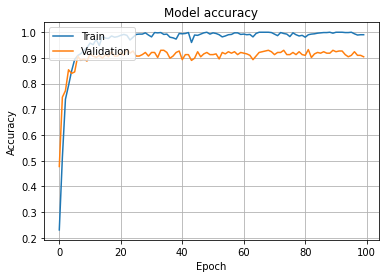

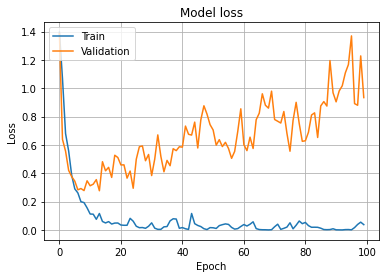

Loss: 0.9339659810066223 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 90.44944047927856 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:1466.574 sec（秒）


In [51]:
history = model.fit(x_train,y_train, batch_size=5, epochs=100, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

open('cnn_model.json','w').write(model.to_json())
model.save_weights('cnn_weights.h5')
#model.save('cnn_model_weight.h5') #モデル構造と重みを1つにまとめることもできます

score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))